In [1]:
%matplotlib inline
from platform import python_version

print(python_version())

3.9.7


# PYGMT Experimentation

This notebook will be used for writing the experimental code for COSC480 and determining the direction of the project. Essentially, a journal of the process to creating the finished product. For this project, I would like to design a free standing simulation or GUI showing the land loss consiquences of sea level rise. To start, plan to use pygmt to access relief data at various resolutions and plot the elevation maps. Much of the code that follows is a result of exploring examples on the pygmt website.

In [3]:
import pygmt

Now, I want to make a function for simply viewing maps through pygmt. For this, I first need a function to get the relief data.

In [13]:
def get_relief_grid(area):
    """Loads the relief data for the area of choice.
    
       The choosen grid is the highest resolution 01s (1 arc-second)
       The area is input as a list with the format [xmin,xmax,ymin,ymax]
       Returns a xarray.DataArray grid."""
    return pygmt.datasets.load_earth_relief(resolution = "15s", region = area)

Now, given a tuple with co-ordinate data, I want to define the region of interest.


In [5]:
def round_to_one(float_num):
    """Rounds a float value to one decimal place."""
    return round(float_num * 10)/10

def get_ROI(center_coords, spread):
    """Makes a list of [xmin,xmax,ymin,ymax] to define a square area 
       around the central co-ordnates offset in each direction by the 
       spread parameter (in degrees).  
       Float values are truncated to one decimal place to decrease the 
       likelyhood of errors"""
    xmin = round_to_one(center_coords[0] - spread)
    xmax = round_to_one(center_coords[0] + spread)
    ymin = round_to_one(center_coords[1] - spread)
    ymax = round_to_one(center_coords[1] + spread)
    return [xmin,xmax,ymin,ymax]
    

Now, a simple function to plot:

In [59]:
def plot_map(grid, area):
    """Plot the grid map out with a mercanter projection."""
    fig = pygmt.Figure()
    fig.grdimage(grid=grid, projection="M20c", frame=area, cmap="geo")
    fig.show()

Now, lets test the code:


[171.6, 173.6, 42.0, 44.0]


grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain


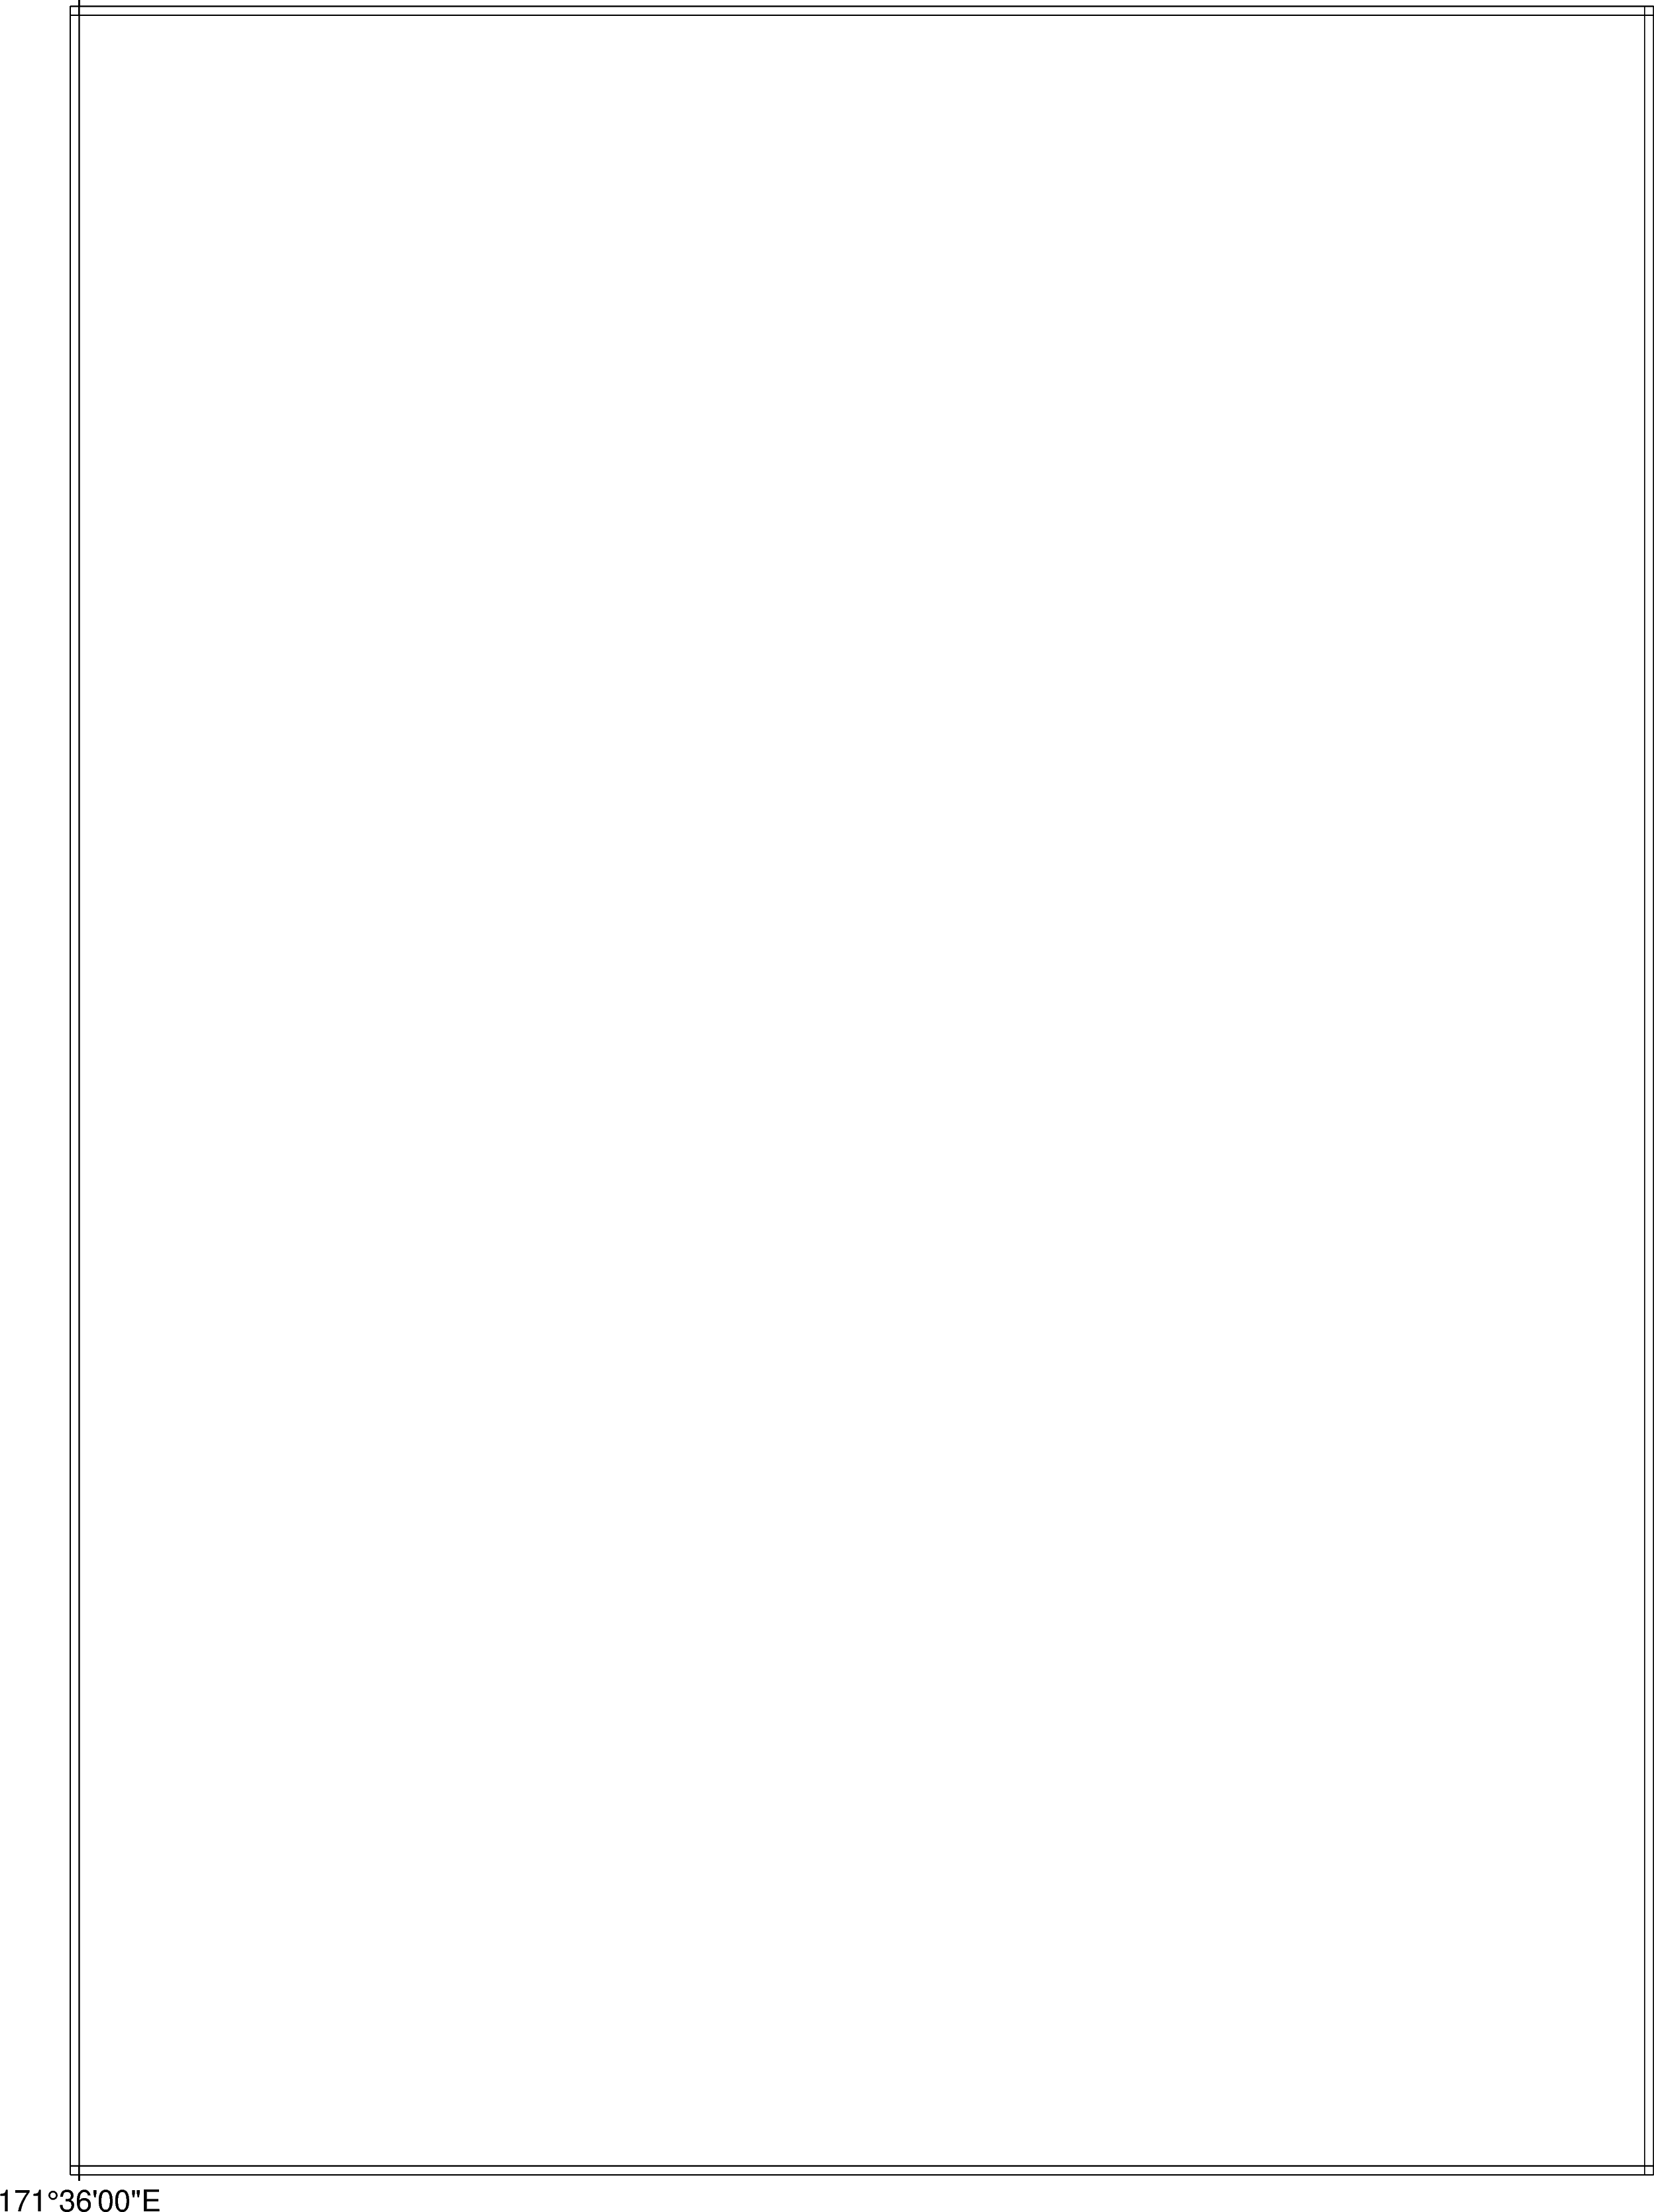

In [61]:
christchurch = (172.6, 43)
spread = 1 #degree
area = get_ROI(christchurch, spread)
print(area)
grid = get_relief_grid(area)
plot_map(grid, area)